# Tratamento de Dados Brutos

In [3]:
# Importando libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [18]:
# Import de dataset raw
raw_dataset = pd.read_csv('https://raw.githubusercontent.com/nandodevs/amazon-tv-video-analysis/2dc71a35c71d85afe0b8ec7a2ca33ee6fd4798f9/data/raw/dataset_origin.csv')

#Principais dados
raw_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [6]:
# Informações
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [19]:
raw_dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [20]:
# Valores Nulos
raw_dataset.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [22]:

# Campos únicos
raw_dataset.nunique()


show_id         9668
type               2
title           9668
director        5773
cast            7927
country           86
date_added        84
release_year     100
rating            24
duration         219
listed_in        518
description     9414
dtype: int64

In [30]:
# Valores únicos em Coluna
raw_dataset['rating'].value_counts()

rating
13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: count, dtype: int64

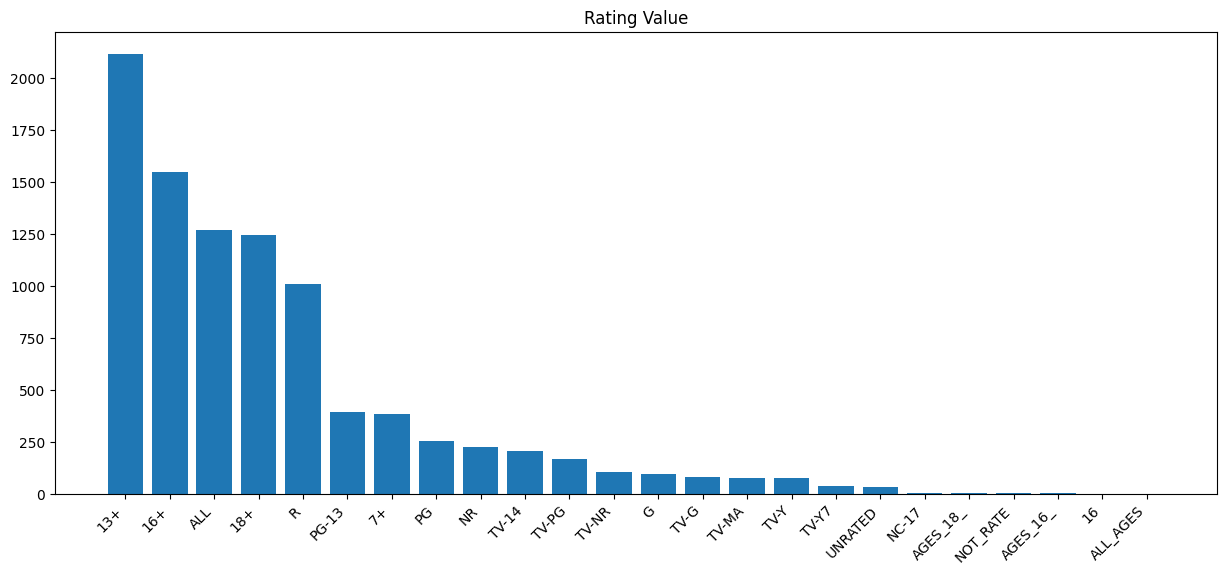

In [33]:
# Gráficos de Análise dos Setores
plt.figure(figsize=(15,6))
plt.title('Rating Value')
plt.bar(raw_dataset['rating'].value_counts().index, raw_dataset['rating'].value_counts());
plt.xticks(rotation=45, ha='right');

In [52]:
# Análise dos países 
countries = raw_dataset['country'].value_counts(normalize=True) * 100

# Principais países
print(countries.head(20).round(2))


country
United States                    37.65
India                            34.08
United Kingdom                    4.17
Canada                            2.38
United Kingdom, United States     1.79
Spain                             1.19
Italy                             1.19
Canada, United States             1.04
United States, United Kingdom     0.89
India, United States              0.74
Germany                           0.74
United States, Canada             0.60
Australia                         0.60
United States, India              0.45
France                            0.45
United States, France             0.45
Japan                             0.30
Switzerland                       0.30
United States, Germany            0.30
Mexico                            0.30
Name: proportion, dtype: float64


In [29]:
min_year = raw_dataset['release_year'].min() 
max_year = raw_dataset['release_year'].max()
print(f"Min Year is: {min_year} and Max Year is: {max_year}")

Min Year is: 1920 and Max Year is: 2021
